In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('uber_travel_data.csv')

In [3]:
df.shape

(4542026, 5)

In [4]:
df.head()

,sourceid,source,dstid,destination,travel_time
0,1,"300 Ring Road, Block CB, Naraina Village, Nara...",1,"300 Ring Road, Block CB, Naraina Village, Nara...",283
1,1,"300 Ring Road, Block CB, Naraina Village, Nara...",1,"300 Ring Road, Block CB, Naraina Village, Nara...",266
2,1,"300 Ring Road, Block CB, Naraina Village, Nara...",1,"300 Ring Road, Block CB, Naraina Village, Nara...",238
3,1,"300 Ring Road, Block CB, Naraina Village, Nara...",1,"300 Ring Road, Block CB, Naraina Village, Nara...",269
4,1,"300 Ring Road, Block CB, Naraina Village, Nara...",1,"300 Ring Road, Block CB, Naraina Village, Nara...",259


In [10]:
df[['sourceid', 'dstid']].drop_duplicates().shape[0]

70429

In [13]:
df.value_counts(['sourceid', 'dstid']).sort_values()

sourceid  dstid
69        4        50
167       107      50
          101      50
264       14       50
167       100      50
                   ..
83        88       79
244       32       79
202       201      79
          135      79
45        170      79
Length: 70429, dtype: int64

In [35]:
df_sample = df[(df['sourceid'] == 1) & (df['dstid']==5)]
df_sample.head()

,sourceid,source,dstid,destination,travel_time
265,1,"300 Ring Road, Block CB, Naraina Village, Nara...",5,"Old Palam Road, Delhi Cantonment, New Delhi",1084
266,1,"300 Ring Road, Block CB, Naraina Village, Nara...",5,"Old Palam Road, Delhi Cantonment, New Delhi",1138
267,1,"300 Ring Road, Block CB, Naraina Village, Nara...",5,"Old Palam Road, Delhi Cantonment, New Delhi",1129
268,1,"300 Ring Road, Block CB, Naraina Village, Nara...",5,"Old Palam Road, Delhi Cantonment, New Delhi",1076
269,1,"300 Ring Road, Block CB, Naraina Village, Nara...",5,"Old Palam Road, Delhi Cantonment, New Delhi",1123


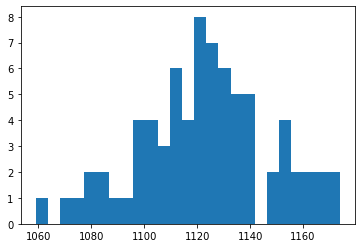

In [36]:
plt.hist(df_sample['travel_time'], bins = 25)
plt.show()

In [37]:
print("Mean:", df_sample['travel_time'].mean())
print("Std:", df_sample['travel_time'].std())

Mean: 1122.8133333333333
Std: 24.68268532706591


In [38]:
df_sample = df[(df['sourceid'] == 13) & (df['dstid']==66)]
df_sample.head()

,sourceid,source,dstid,destination,travel_time
221237,13,"10, Aurangzeb Road, New Delhi",66,"nullBhagat Singh Market Marg, Block K, Malviya...",1335
221238,13,"10, Aurangzeb Road, New Delhi",66,"nullBhagat Singh Market Marg, Block K, Malviya...",1269
221239,13,"10, Aurangzeb Road, New Delhi",66,"nullBhagat Singh Market Marg, Block K, Malviya...",1248
221240,13,"10, Aurangzeb Road, New Delhi",66,"nullBhagat Singh Market Marg, Block K, Malviya...",1299
221241,13,"10, Aurangzeb Road, New Delhi",66,"nullBhagat Singh Market Marg, Block K, Malviya...",1322


In [39]:
df_sample.shape

(70, 5)

<AxesSubplot:xlabel='travel_time', ylabel='Count'>

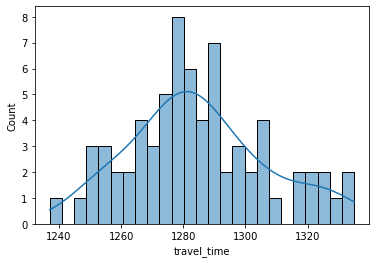

In [46]:
sns.histplot(df_sample['travel_time'],bins=25, kde=True)

In [48]:
df.isna().sum()

sourceid            0
source         832748
dstid               0
destination    797904
travel_time         0
dtype: int64

### Bootstrapping in Python

In [96]:
r = 1000

sample = df_sample['travel_time'].values

size = sample.shape[0]

bs_samples = []

for i in range(r):
    bs_sample = np.random.choice(sample, size = size)
    bs_samples.append(bs_sample.mean())
    
bs_samples = np.array(bs_samples)

In [97]:
bs_samples[:5]

array([1283.5       , 1285.17142857, 1286.91428571, 1285.74285714,
       1286.35714286])

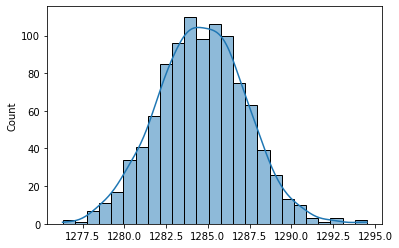

In [98]:
sns.histplot(bs_samples, bins = 25 , kde = True)
plt.show()

In [91]:
print(bs_samples.mean())
print(np.median(bs_samples))

1284.5588857142855
1284.5142857142857


#### Exponential Distribution

In [99]:
sample = np.random.exponential(scale=10,size=1000)

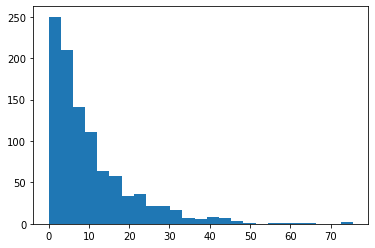

In [101]:
plt.hist(sample, bins = 25)
plt.show()

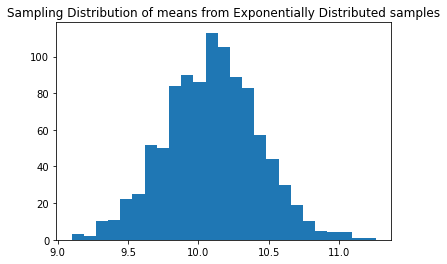

In [102]:
r = 1000
size = len(sample)
bs_means = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(sample, size=size)
    bs_means[i] = np.mean(bs_sample)

plt.figure()
plt.hist(bs_means, bins=25)
plt.title("Sampling Distribution of means from Exponentially Distributed samples")
plt.show()

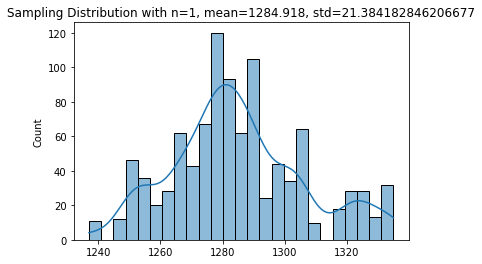

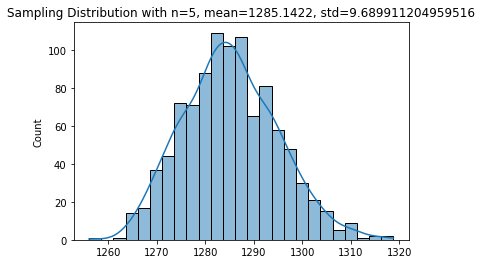

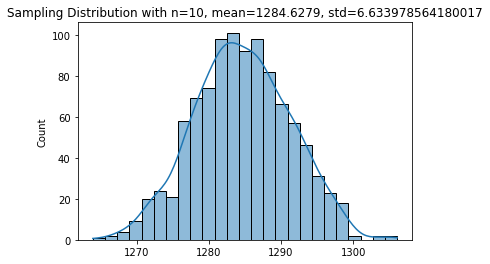

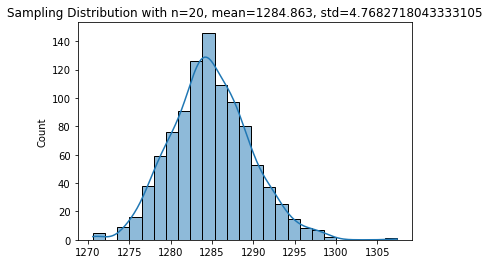

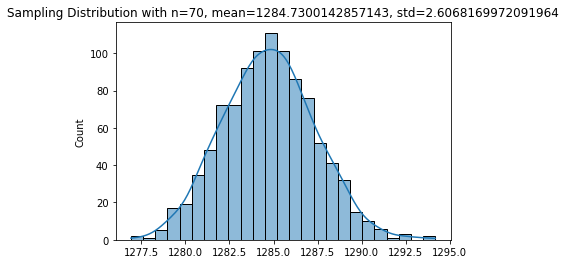

In [120]:
np.random.seed(0)

r = 1000
n_list = [1, 5, 10, 20, len(df_sample["travel_time"])]
sample = df_sample["travel_time"]

for n in n_list:
    bs_means = np.empty(r)
    for i in range(r):
        bs_sample = np.random.choice(sample, size=n)
        bs_means[i] = np.mean(bs_sample)
    plt.figure()
    sns.histplot(bs_means, bins=25, kde = True)
    plt.title(f"Sampling Distribution with n={n}, mean={np.mean(bs_means)}, std={np.std(bs_means)}")
    plt.show()

In [107]:
df_sample.shape[0]

70

In [108]:
len(df_sample)

70

In [163]:
r = 1000
n_list = [1, 5, 10, 20, len(df_sample["travel_time"])]
sample = df_sample["travel_time"].values

for n in n_list:
    bs_means = np.empty(r)
    for i in range(r):
        bs_sample = np.random.choice(sample, size=n)
        bs_means[i] = np.mean(bs_sample)
    print("n = {}, emperical standard error = {}, theoritical std = {}".format(n, bs_means.std(), sample.std()/ (n**0.5) ))

n = 1, emperical standard error = 21.637097194402024, theoritical std = 21.89923118583418
n = 5, emperical standard error = 9.670050173603029, theoritical std = 9.79363391730171
n = 10, emperical standard error = 6.781366540749734, theoritical std = 6.925144955382611
n = 20, emperical standard error = 4.886249195190518, theoritical std = 4.896816958650855
n = 70, emperical standard error = 2.5278707115851082, theoritical std = 2.617458763573697


In [131]:
sample.std()/ (n**0.5) 

21.89923118583418

In [128]:
sample.std()/(10)**0.5

6.925144955382611

# Interval Estimates - Confidence Interval.

In [168]:
mu = bs_means.mean()
sig = bs_means.std()

print(mu, sig)


1284.6818714285714 2.5278707115851082


In [170]:
[mu - 2*sig, mu+2*sig]

[1279.6261300054011, 1289.7376128517417]

## 90% confidence interval

In [172]:
np.percentile(bs_means, 5), np.percentile(bs_means, 95)

(1280.4285714285713, 1288.672142857143)

In [174]:
df_sample['travel_time'].mean()

1284.6285714285714